# Logistic Regression and Regularization
- Regularization combats overfitting by making the model coefficients smaller. 
- In scikit-learn, the hyperparameter "C" is the inverse of the regularization strength. In other words, larger C means less regularization and smaller C means more regularization.
- In sklearn.linear_model LogisticRegression() the penalty is 'L2' or Ridge Regression by default. In order to specify that you would like to use Lasso Regression you must place the hyperprameter " penalty= 'l1' ".
- Lasso Regression is both a regression model and can be used for feature selection. Ridge does not do feature selection.
- When selecting Lasso Regression you also must specify the solver as the native solver does not work with L1.
- Regularization is supposed to combat overfitting, and there's a connection between overconfidence and overfitting.
- The ratio of the coefficients gives us the slope of the line, and the magnitude of the coefficients gives us our confidence level.
- Regularization not only affects the confidence, but also the orientation of the boundary.
- Smaller values of C lead to less confident predictions. That's because smaller C means more regularization, which in turn means smaller coefficients, which means raw model outputs closer to zero and, thus, probabilities closer to 0.5 after the raw model output is squashed through the sigmoid function.
<br><br>
Which of the following transformations would make sense for transforming the raw model output of a linear classifier into a class probability? Sigmoid
<br><br>
If you fit a logistic regression model on a classification problem with 3 classes and 100 features, how many coefficients would you have, including intercepts? 303


In [8]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# Colors to define the 3 categories
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
labels=['sr','og','^b']
colors=['r','g','b']

# Creating the plotting function
def plot_data(x,y,title):
    #Plot the results
    for i in [1,2,3]:
      plt.plot(x[y==i,0],x[y==i,1],labels[i-1])
    plt.axis('tight')
    plt.xlabel('area')
    plt.ylabel('compactness')
    plt.title(title)
    

#Define classifier plotting function
def plot_classifier(x,y,clf,title):

    #Prepare grid for plotting decision surface
    gx1, gx2 = np.meshgrid(np.arange(min(x[:,0]), max(x[:,0]),(max(x[:,0])-min(x[:,0]))/200.0 ),
                         np.arange(min(x[:,1]), max(x[:,1]),(max(x[:,1])-min(x[:,1]))/200.0))
    gx1l = gx1.flatten()
    gx2l = gx2.flatten()
    gx   = np.vstack((gx1l,gx2l)).T

    #Compute a prediction for every point in the grid
    gyhat = clf.predict(gx)
    gyhat = gyhat.reshape(gx1.shape)

    #Plot the results
    for i in [1,2,3]:
      plt.plot(x[y==i,0],x[y==i,1],labels[i-1]);
    plt.xlabel('area');
    plt.ylabel('compactness');
    plt.pcolormesh(gx1,gx2,gyhat,cmap=cmap_light)
    plt.colorbar();
    plt.axis('tight');
    plt.title(title);

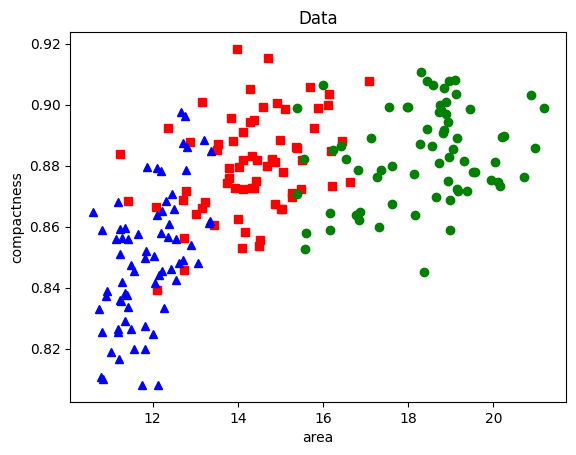

In [9]:
# Loading data and converting it to an array
data = pd.read_csv('../_datasets/Grains/seeds.csv', header=None).to_numpy()

x = data[:,[0,2]]
y = data[:,-1]

plot_data(x, y, 'Data')

In [10]:
# Classifications
print(y)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]


### Fit a (multiclass) logistic regression model

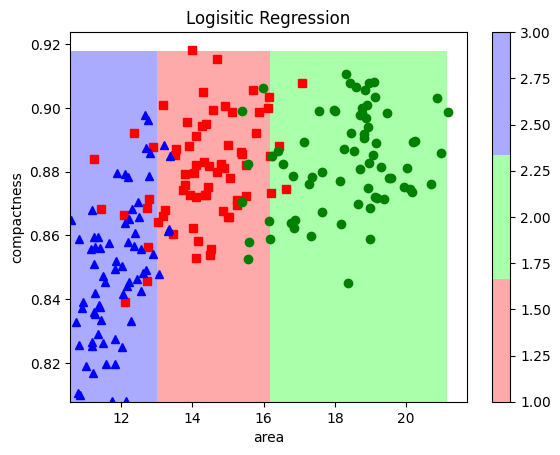

In [11]:
from sklearn import linear_model

clf = linear_model.LogisticRegression(C=.1)   # C = 1/lambda --> regularization!
clf.fit(x, y)
plot_classifier(x,y,clf,'Logisitic Regression')

### Fit an LDA model (Linear Discriminant Analysis)

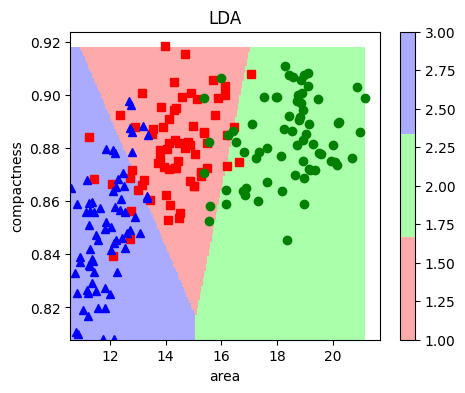

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(x, y)

plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
plot_classifier(x,y,clf,'LDA')

### Fit a (Gaussian) Naive Bayes model

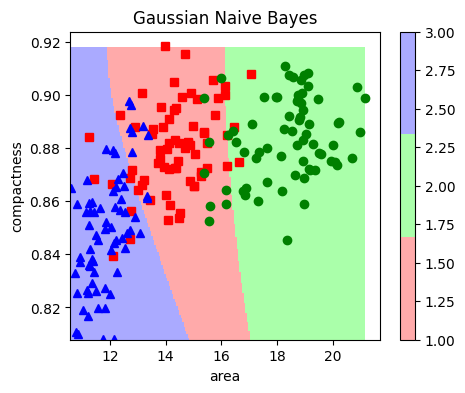

In [13]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(x, y)

plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
plot_classifier(x,y,clf,'Gaussian Naive Bayes')

### One-vs-Rest and Softmax/Multinomial
##### One-vs-Rest
- Fit a binary classifier for each class
- Predict with all, take largest output
- Common for SVM's as well
- Can produce probabilities
- PRO: simple, modular
- CON: not directly optimizing
##### Multinomial or Softmax
- Fit a single classifier for all classes
- Prediction directly outputs best class
- Possible for SVMs, but less common
- Can produce probabilities
- PRO: tackle the problem directly
- CON: more complicated, new code

In [14]:
# Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# load df
data = pd.read_csv('../_datasets/Grains/seeds.csv', header=None)

# Split data
X = data.iloc[:,0:6].values
y = data.iloc[:,7].values

# Parse train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)

#  Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression(multi_class= 'ovr')
lr_ovr.fit(X_train, y_train)

print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy    :", lr_ovr.score(X_test, y_test))

# Fit softmax classifier
lr_mn = LogisticRegression(multi_class= 'multinomial')
lr_mn.fit(X_train, y_train)

print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy    :", lr_mn.score(X_test, y_test))

OVR training accuracy: 0.89171974522293
OVR test accuracy    : 0.8867924528301887
Softmax training accuracy: 0.89171974522293
Softmax test accuracy    : 0.9056603773584906


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
